<a href="https://colab.research.google.com/github/krakowiakpawel9/ml_course/blob/master/cont/11_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
np.random.seed(42)

In [0]:
iris = load_iris()
data = iris.data
targets = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [0]:
all_data = np.c_[data, targets]

In [4]:
df = pd.DataFrame(all_data, columns=feature_names + ['target'])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [0]:
data = data[:, [0, 1]]
target = df['target'].apply(int).values

In [40]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, random_state=42)

classifier.fit(data, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [41]:
classifier.score(data, target)

0.9266666666666666

Text(0.5, 1.0, 'Las Losowy n_estimators=10')

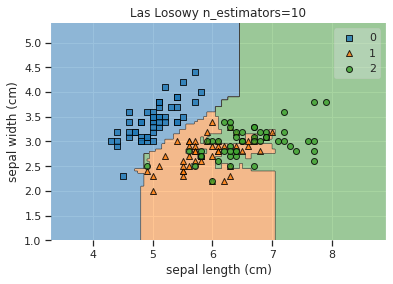

In [42]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(data, target, classifier)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Las Losowy n_estimators=10')

Text(0.5, 1.0, 'Las Losowy')

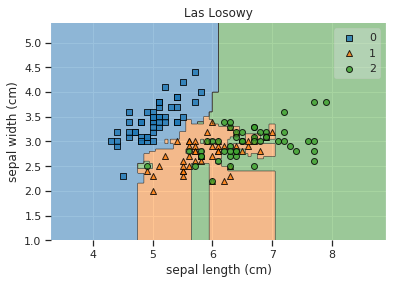

In [27]:
plot_decision_regions(data, target, classifier)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.title('Las Losowy')

In [13]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': np.arange(1, 100)}]

gs = GridSearchCV(classifier, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=F...
             param_grid=[{'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26

In [14]:
gs.best_score_

0.7410714285714286

In [0]:
model = gs.best_estimator_

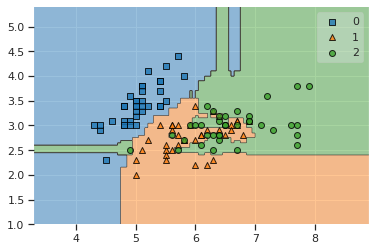

In [16]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train, y_train, model)

In [0]:
y_pred = model.predict(X_test)


In [18]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print(acc)

0.7368421052631579


In [19]:
model.feature_importances_

array([0.63366499, 0.36633501])

### All features

In [0]:
data = iris.data
targets = iris.target

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, targets)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (112, 4)
X_test shape: (38, 4)
y_train shape: (112,)
y_test shape: (38,)


In [22]:
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_estimators': np.arange(1, 100)}]

gs = GridSearchCV(classifier, param_grid=param_grid, scoring='accuracy', n_jobs=-1)
gs.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=...
             param_grid=[{'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26

In [24]:
model = gs.best_estimator_

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.9473684210526315

In [25]:
model.feature_importances_

array([0.10362372, 0.00945026, 0.43385647, 0.45306955])

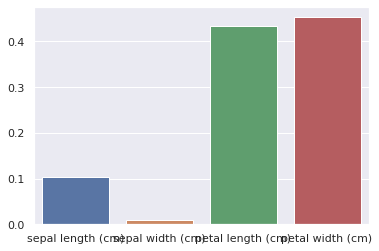

In [26]:
sns.barplot(x=feature_names, y=model.feature_importances_)